# *Private Schools in Dubai, U.A.E*

## 1) Introduction : Background and Problem

### Dubai is a multi-racial society where people from different countries reside with peace and harmony. Each communtiy has it's own education institutions imparting quality education to children from different walks of life.

### The *Knowledge and Human Development Authority (KHDA)* is the educational quality assurance and regulatory authority of the Government of Dubai, U.A.E . It over sees private education sector in Dubai. It is responsible for the growth and quality of private education in Dubai. Dubai Schoools Inspection Bureau (DSIB) a part of KHDA, is a group of inspectors who assess the schools. The evaluation is done on the effectiveness of the school, the learning environment, the achievements of students and the self-evaluation process of schools. Inspections also focus on Islamic Education, English, Maths, Science and Arabic. The schools are rated as follows :-
### - Outstanding
### - Very Good
### - Good
### - Acceptable
### - Weak

### In this project, I will make an analysis of private schools available in different areas in Dubai, to assist parents in selecting an appropriate school for their child based on the KHDA rating.
### Target audience will be New Residents and People who are residing in Dubai looking for quality education for their children.

## 2) Data Description :

### - KHDA releases data on education institutions every year. The open data is taken from their website https://www.khda.gov.ae/CMS/WebParts/TextEditor/Documents/DubaiPrivateSchoolsOpenData.xlsx
### The data columns that I will use for analysis are School Name, Location, Latitude, Longitude, Type of School, 2018/19 DSIB Rating, 2019/20 DSIB Rating.
### - Based on the ratings, I will do analysis for the years 2018 - 2019, 2019 - 2020 and will show private schools in different areas in Dubai.
### - I will build the code to scrape the Wikipedia page https://en.wikipedia.org/wiki/List_of_communities_in_Dubai which consists of list of communities (areas) in Dubai. I will use it to get the latitude and longitude of different areas in Dubai. By using the BeautifulSoup package, it will transform the data in a table in the pandas dataframe.
### - All data related to locations are obtained by using Foursquare API and Python libraries.

### Import necessary libraries

In [1]:
from bs4 import BeautifulSoup
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt

# libraries for displaying images
from IPython.display import Image
from IPython.core.display import HTML

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!pip install xlrd # to read excel files

! pip install folium==0.5.0
import folium # plotting library
print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 79 kB 8.1 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=c63b313b0a373b0c2310baf00325f34fb2ebec924dade16a796bab6d4565ed01
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Folium installed
Libraries imported.


In [2]:
# Reading the data and converted it to a dataframe
df = pd.read_excel('https://www.khda.gov.ae/CMS/WebParts/TextEditor/Documents/DubaiPrivateSchoolsOpenData.xlsx' ,
                  sheet_name='Main information 2020-2021' ,
                   skiprows=1,
                   usecols = "B,D,E:F,G,X:Y") # Using the necessary columns from the excel file and creating a new data frame
                             
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df.head()

,School Name,Location,Latitude,Longitude,Type of School,2018/19\nDSIB Rating,2019/20\nDSIB Rating
0,Al Adab Iranian Private School for Boys,Al Qusais,25.276381,55.368653,Iranian,Acceptable,Good
1,Al Adab Iranian Private School for Girls,Al Qusais,25.276431,55.369036,Iranian,Acceptable,Acceptable
2,Al Arqm Private School,Al Barsha 1,25.108728,55.188987,Ministry of Education,Acceptable,Acceptable
3,Al Basateen Private Nursery,Al Khawaneej 1,25.231106,55.522533,Ministry of Education,Good,Good
4,Al Basateen Private Nursery Hatta branch,Hatta,24.798719,56.124897,Ministry of Education,Good,Good


### Data Preprocessing and Data Cleaning

In [4]:
# Renaming the column '2018/19\nDSIB Rating' in df as '2018/19'
df=df.rename({'2018/19\nDSIB Rating':'2018-19'},axis=1)
# Renaming the column '2019/20\nDSIB Rating' in df as '2019/20'
df=df.rename({'2019/20\nDSIB Rating':'2019-20'},axis=1)
# Rename School Name to SchoolName
df=df.rename({'School Name':'SchoolName'},axis=1)
# Rename Tyoe of School to TypeofSchool
df=df.rename({'Type of School':'TypeofSchool'},axis=1)
df.head()

,SchoolName,Location,Latitude,Longitude,TypeofSchool,2018-19,2019-20
0,Al Adab Iranian Private School for Boys,Al Qusais,25.276381,55.368653,Iranian,Acceptable,Good
1,Al Adab Iranian Private School for Girls,Al Qusais,25.276431,55.369036,Iranian,Acceptable,Acceptable
2,Al Arqm Private School,Al Barsha 1,25.108728,55.188987,Ministry of Education,Acceptable,Acceptable
3,Al Basateen Private Nursery,Al Khawaneej 1,25.231106,55.522533,Ministry of Education,Good,Good
4,Al Basateen Private Nursery Hatta branch,Hatta,24.798719,56.124897,Ministry of Education,Good,Good


In [5]:
# To replace empty strings with NaN
df = df.replace(r'^\s*$', np.NaN, regex=True)
# Replacing 'Not yet inspected' in the dataframe with NaN
df.replace('Not yet inspected',np.nan,inplace=True)
# Replacing 'Not inspected due to Covid 19' in the dataframe with NaN
df.replace(['Not inspected due to Covid 19', 'NULL', 'NA'],np.nan,inplace=True)
df.tail(20)

,SchoolName,Location,Latitude,Longitude,TypeofSchool,2018-19,2019-20
190,The City School International Private,Nad Al Hammar,25.193606,55.388731,UK,Good,Good
191,The English College Dubai,Umm Suqueim 1,25.169943,55.238591,UK,Good,Good
192,The Indian Academy,Al Muhaisnah 4,25.281935,55.401917,Indian,NaN,Good
193,The Indian High School,Oud Metha,25.240542,55.315133,Indian,Good,Very Good
194,The Indian High School-Branch,Al Garhoud,25.248436,55.340581,Indian,Good,Good
195,The Indian International School (DSO Branch),Dubai Silicon Oasis,25.115873,55.375965,Indian,Acceptable,Acceptable
196,The International School of Choueifat,Al Sufouh 1,25.107181,55.171625,SABIS (UK/US),Acceptable,Acceptable
197,The International School of Choueifat - Branch,Dubai Investment Park,24.987420,55.171988,SABIS (UK/US),Acceptable,Acceptable
198,The Kindergarten Starters,Al Garhoud,25.247964,55.339353,Indian,Good,Good
199,The Millenium School,Al Qusais,25.285803,55.367813,Indian,Very Good,Very Good


In [6]:
df.shape

(210, 7)

In [7]:
# Drop the rows with Nan 2018-19, 2019-20 as some are new schools, some were not inspected due to covid 19
df.dropna(subset=['2018-19', '2019-20'],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,SchoolName,Location,Latitude,Longitude,TypeofSchool,2018-19,2019-20
0,Al Adab Iranian Private School for Boys,Al Qusais,25.276381,55.368653,Iranian,Acceptable,Good
1,Al Adab Iranian Private School for Girls,Al Qusais,25.276431,55.369036,Iranian,Acceptable,Acceptable
2,Al Arqm Private School,Al Barsha 1,25.108728,55.188987,Ministry of Education,Acceptable,Acceptable
3,Al Basateen Private Nursery,Al Khawaneej 1,25.231106,55.522533,Ministry of Education,Good,Good
4,Al Basateen Private Nursery Hatta branch,Hatta,24.798719,56.124897,Ministry of Education,Good,Good


In [8]:
df.shape

(152, 7)

## 3) Methodology

### Data Analysis and Data Visualization

### @ *Private Schools with different Curriculum*
### There are more than 10 types of different curriculums in Schools. 

In [9]:
# Number of types of private schools
df['TypeofSchool'].value_counts()

  UK                             48
  Indian                         26
  American                       20
UK                                9
  Ministry of Education           9
  International Baccalaureate     7
UK/IB                             6
  Iranian                         5
  French                          4
Indian                            3
  SABIS (UK/US)                   2
  Pakistani                       2
  Philippine                      2
American                          2
  Iranian - IB                    1
  Indian - IB                     1
UK - UK/IB                        1
  Russian                         1
  US/IB                           1
  American/ IB                    1
  Japanese                        1
Name: TypeofSchool, dtype: int64

In [10]:
# Dataframe for the curriculum
data = {'Curriculum': ['UK', 'American', 'Indian', 'UAE Ministry of Education', 'IB', 'Others'], 
       'Number of Schools': [64, 21, 27, 9, 7, 24]}
dxb_cur = pd.DataFrame (data, columns = ['Curriculum', 'Number of Schools'])
print(dxb_cur)

                  Curriculum  Number of Schools
0                         UK                 64
1                   American                 21
2                     Indian                 27
3  UAE Ministry of Education                  9
4                         IB                  7
5                     Others                 24


### *PIE CHART*

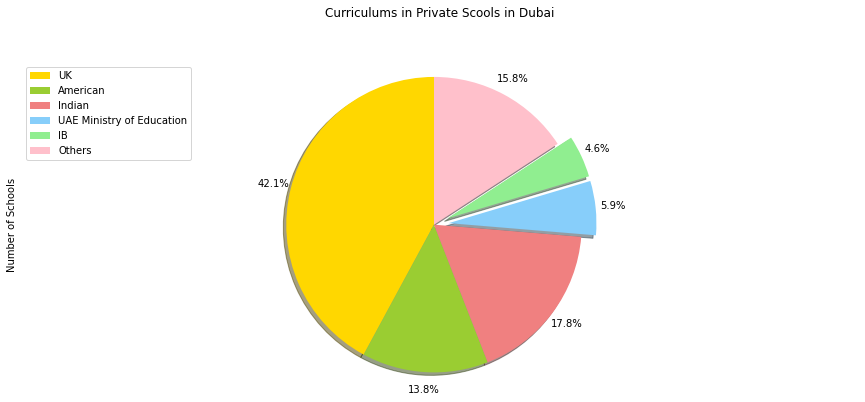

In [11]:
# Pie chart to show the percentages of different curriculums in the private schools.

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0, 0, 0.1, 0.1, 0] # ratio for each continent with which to offset each wedge.

dxb_cur['Number of Schools'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 2 Number of Schools
                            )

# scale the title up by 12% to match pctdistance
plt.title('Curriculums in Private Scools in Dubai', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=dxb_cur['Curriculum'], loc='upper left') 

plt.show()

### - Majority of schools have British (UK) curriculum i.e. 42.1%
### - UAE Ministry of Education curriculum is used by all public and some private schools that have chosen to follow it. 9 private schools follow it i.e          5.9% of schools follow it.
### - The International Baccalaureate® (IB) offers a continuum of international education. 4.6% schools follow it.
### - Others consists of 15.8% which consists of different curriculums namely Pakistani, Iranian, French, Philippine, SABIS, Japanese, Russian

### @*Ratings of the Schools for the year 2018-19 and 2019-2020*

In [12]:
# Number of ratings
df['2018-19'].value_counts()

Good           66
Acceptable     39
Very Good      26
Outstanding    17
Weak            4
Name: 2018-19, dtype: int64

In [13]:
df['2019-20'].value_counts()

Good           56
Acceptable     40
Very Good      37
Outstanding    17
Weak            2
Name: 2019-20, dtype: int64

In [14]:
df.dtypes

SchoolName       object
Location         object
Latitude        float64
Longitude       float64
TypeofSchool     object
2018-19          object
2019-20          object
dtype: object

In [15]:
# New Dataframe
data = {'Ratings': ['Weak', 'Acceptable', 'Good', 'Very Good', 'Outstanding'],
       '2018-19': [4, 39, 66, 26, 17],
       '2019-20': [2, 40, 56, 37,17]}
bar_df = pd.DataFrame (data, columns = ['Ratings', '2018-19', '2019-20'])
print(bar_df)

       Ratings  2018-19  2019-20
0         Weak        4        2
1   Acceptable       39       40
2         Good       66       56
3    Very Good       26       37
4  Outstanding       17       17


### *Grouped Bar Chart*

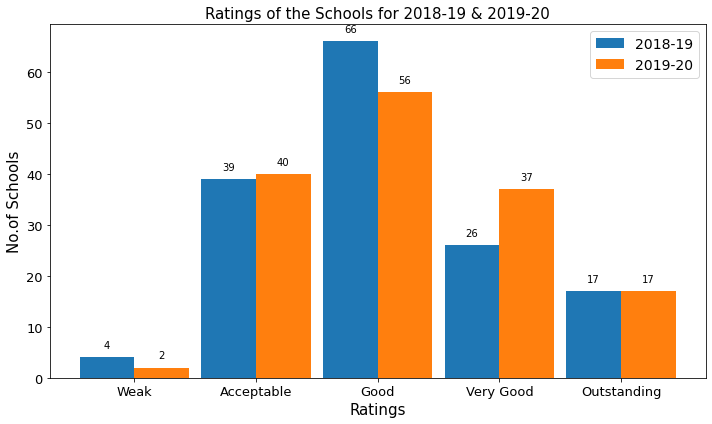

In [16]:
# Grouped bar chart
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

x = np.arange(len(bar_df['Ratings']))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, bar_df['2018-19'], width, label='2018-19')
rects2 = ax.bar(x + width/2, bar_df['2019-20'], width, label='2019-20')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Ratings', fontsize=15)
ax.set_ylabel('No.of Schools', fontsize=15)
ax.set_title('Ratings of the Schools for 2018-19 & 2019-20', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(bar_df['Ratings'])
ax.legend(prop={"size":14})

for label in (ax.get_xticklabels() + ax.get_yticklabels()):label.set_fontsize(13)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 7),  # 7 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### + In 2019-20, 35.5% of schools are rated Very Good or better, compared to 28% in 2018-19.
### + The proportion of Good ratings have reduced, but there is an increase in the proportion of Very Good rating.
### + Decrease in the Weak rating from 4 to 2 schools.

### @ *Locations with Higher Number of Private Schools in Dubai*

In [17]:
dub_com = df.select_dtypes(include=['object']).copy()
dub_com.head()

,SchoolName,Location,TypeofSchool,2018-19,2019-20
0,Al Adab Iranian Private School for Boys,Al Qusais,Iranian,Acceptable,Good
1,Al Adab Iranian Private School for Girls,Al Qusais,Iranian,Acceptable,Acceptable
2,Al Arqm Private School,Al Barsha 1,Ministry of Education,Acceptable,Acceptable
3,Al Basateen Private Nursery,Al Khawaneej 1,Ministry of Education,Good,Good
4,Al Basateen Private Nursery Hatta branch,Hatta,Ministry of Education,Good,Good


In [18]:
dub_com["2018-19"] = dub_com["2018-19"].astype('category')
dub_com["2019-20"] = dub_com["2019-20"].astype('category')
dub_com.dtypes

SchoolName        object
Location          object
TypeofSchool      object
2018-19         category
2019-20         category
dtype: object

In [19]:
dub_com.groupby('Location').count()

,SchoolName,TypeofSchool,2018-19,2019-20
Location,,,,
Academic City,1,1,1,1
Al Barsha 1,3,3,3,3
Al Barsha 2,5,5,5,5
Al Garhoud,8,8,8,8
Al Karama,2,2,2,2
...,...,...,...,...
Umm AL Sheif,1,1,1,1
Umm Hurair,1,1,1,1
Umm Suqueim 1,2,2,2,2


In [20]:
dub_com.groupby('Location')['Location'].count().sort_values().tail(22)

Location
Al Khail                  3
Al Barsha 1               3
Mirdif                    3
Al Mizhar 1               3
Al Sufouh 1               3
Al Muhaisnah 4            3
Al Safa 1                 3
Jebel Ali                 3
Al Wasl                   3
Al Twar 1                 3
Deira                     3
Dubai Land                4
Dubai Investment Park     4
Umm Suqueim 3             4
Al Barsha 2               5
Al Warqa'a 1              5
Al Muhaisnah 1            5
Al Nahda 2                6
Oud Metha                 6
Al Quoz 1                 7
Al Garhoud                8
Al Qusais                15
Name: Location, dtype: int64

### Horizontal Bar Graph

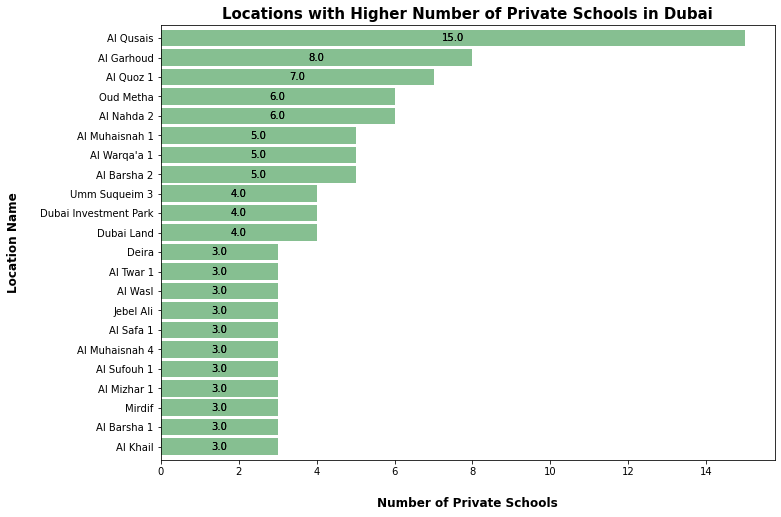

In [21]:
# Top communities with Private Scools in Dubai
x = dub_com.groupby('Location')['Location'].count().sort_values().tail(22)
x.plot(kind='barh')

ax = x.plot(kind='barh', figsize=(11, 8), color='#86bf91', zorder=2, width=0.85)

# Set x-axis label
ax.set_xlabel("Number of Private Schools", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Location Name", labelpad=20, weight='bold', size=12)

# Title
ax.set_title("Locations with Higher Number of Private Schools in Dubai", weight='bold', fontsize=15)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(width), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center')


plt.show()

### Higher number of private schools are in Al Qusais, Al Garhoud, Al Quoz 1.

### ~ *Web Scrapping*

In [22]:
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_communities_in_Dubai').text
soup = BeautifulSoup(website_url, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of communities in Dubai - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"YBu-DgpAMNEAAjCDjKAAAAAV","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_communities_in_Dubai","wgTitle":"List of communities in Dubai","wgCurRevisionId":1003991043,"wgRevisionId":1003991043,"wgArticleId":23415980,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Communities in Dubai","Neighbourhoods in the

In [23]:
table = soup.find('table',{'class':'wikitable sortable'})
table

<table class="wikitable sortable">
<tbody><tr>
<th>Community Number
</th>
<th>Community (English)</th>
<th>Community (Arabic)</th>
<th>Area(km<sup>2</sup>)</th>
<th>Population(2000)</th>
<th>Population density(/km<sup>2</sup>)
</th></tr>
<tr>
<td>126
</td>
<td><a href="/wiki/Abu_Hail" title="Abu Hail">Abu Hail</a></td>
<td>أبو هيل</td>
<td>1.27 km²</td>
<td>21,414</td>
<td>16,861.4/km²
</td></tr>
<tr>
<td>711
</td>
<td><a class="new" href="/w/index.php?title=Al_Awir_First&amp;action=edit&amp;redlink=1" title="Al Awir First (page does not exist)">Al Awir First</a></td>
<td>العوير الأولى</td>
<td></td>
<td></td>
<td>
</td></tr>
<tr>
<td>721
</td>
<td><a class="new" href="/w/index.php?title=Al_Awir_Second&amp;action=edit&amp;redlink=1" title="Al Awir Second (page does not exist)">Al Awir Second</a></td>
<td>العوير الثانية</td>
<td></td>
<td></td>
<td>
</td></tr>
<tr>
<td>283
</td>
<td><a class="new" href="/w/index.php?title=Aleyas&amp;action=edit&amp;redlink=1" title="Aleyas (page does no

In [24]:
# Name of the columns of the required dataframe is within <th> tag
col_names=[]
for column in table.find_all('th'):
    col_names.append(column.get_text())
col_names

['Community Number\n',
 'Community (English)',
 'Community (Arabic)',
 'Area(km2)',
 'Population(2000)',
 'Population density(/km2)\n']

In [25]:
# Renaming the columns
col_names[0]='CommunityNumber'
col_names[1]='CommunityName'
col_names[2]='Community (Arabic)'
col_names[3]='Area(km2)'
col_names[4]='Population(2000)'
col_names[5]='Population density(/km2)'
col_names

['CommunityNumber',
 'CommunityName',
 'Community (Arabic)',
 'Area(km2)',
 'Population(2000)',
 'Population density(/km2)']

In [26]:
# Dataframe
df_dubai=pd.DataFrame(columns=col_names)
df_dubai

,CommunityNumber,CommunityName,Community (Arabic),Area(km2),Population(2000),Population density(/km2)


In [27]:
# Extracting columns from the table in the lists A,B,C,D,E and F
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
for row in table.find_all("tr"):
    elements=row.find_all('td')
    if len(elements)==6:
        A.append(elements[0].get_text().strip())
        B.append(elements[1].get_text().strip())
        C.append(elements[2].get_text().strip())
        D.append(elements[3].get_text().strip())
        E.append(elements[4].get_text().strip())
        F.append(elements[5].get_text().strip())

df_dubai['CommunityNumber']=A
df_dubai['CommunityName']=B
df_dubai['Community (Arabic)']=C
df_dubai['Area(km2)']=D
df_dubai['Population(2000)']=E
df_dubai['Population density(/km2)']=F
df_dubai.head()

,CommunityNumber,CommunityName,Community (Arabic),Area(km2),Population(2000),Population density(/km2)
0,126,Abu Hail,أبو هيل,1.27 km²,"21,414","16,861.4/km²"
1,711,Al Awir First,العوير الأولى,,,
2,721,Al Awir Second,العوير الثانية,,,
3,283,Aleyas,العياص,162.4 km2,"1,706",162.4/km2
4,333,Al Bada'a,البدع,0.82 km²,"18,816",22946/km²


In [28]:
# To replace empty strings with NaN
df_dubai = df_dubai.replace(r'^\s*$', np.NaN, regex=True)
df_dubai.head()

,CommunityNumber,CommunityName,Community (Arabic),Area(km2),Population(2000),Population density(/km2)
0,126,Abu Hail,أبو هيل,1.27 km²,"21,414","16,861.4/km²"
1,711,Al Awir First,العوير الأولى,NaN,NaN,NaN
2,721,Al Awir Second,العوير الثانية,NaN,NaN,NaN
3,283,Aleyas,العياص,162.4 km2,"1,706",162.4/km2
4,333,Al Bada'a,البدع,0.82 km²,"18,816",22946/km²


In [29]:
df_dubai.shape

(145, 6)

In [30]:
# Drop the rows with Nan CommunityNumber
df_dubai.dropna(subset=['CommunityNumber'],axis=0,inplace=True)
df_dubai.reset_index(drop=True,inplace=True)
df_dubai.drop(['Community (Arabic)', 'Area(km2)', 'Population(2000)', 'Population density(/km2)'], axis=1, inplace=True )
df_dubai.head()

,CommunityNumber,CommunityName
0,126,Abu Hail
1,711,Al Awir First
2,721,Al Awir Second
3,283,Aleyas
4,333,Al Bada'a


In [31]:
df_dubai.shape

(144, 2)

In [32]:
# Saving the dataframe to csv file
df_dubai.to_csv('Dubai-Data.csv')

In [33]:
df_dubai=pd.read_csv('Dubai-Data.csv') # reading the csv file
df_dubai.head()

,Unnamed: 0,CommunityNumber,CommunityName
0,0,126,Abu Hail
1,1,711,Al Awir First
2,2,721,Al Awir Second
3,3,283,Aleyas
4,4,333,Al Bada'a


In [34]:
df_dubai.drop('Unnamed: 0',axis=1,inplace=True)
df_dubai.head()

,CommunityNumber,CommunityName
0,126,Abu Hail
1,711,Al Awir First
2,721,Al Awir Second
3,283,Aleyas
4,333,Al Bada'a


In [35]:
import requests
locator = Nominatim(user_agent="myGeocoder")
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
df_dubai['location'] = df_dubai['CommunityName'].apply(geocode)
df_dubai['point'] = df_dubai['location'].apply(lambda loc: tuple(loc.point) if loc else None)
df_dubai.head()

,CommunityNumber,CommunityName,location,point
0,126,Abu Hail,"(أبو هيل, دبي, الإمارات العربية المتحدة, (25.2...","(25.2860287, 55.328865, 0.0)"
1,711,Al Awir First,None,None
2,721,Al Awir Second,None,None
3,283,Aleyas,"(Aleyas, دبي, الإمارات العربية المتحدة, (25.21...","(25.2117884, 55.536023378308464, 0.0)"
4,333,Al Bada'a,"(البدع, دبي, الإمارات العربية المتحدة, (25.224...","(25.2246261, 55.2684831, 0.0)"


In [36]:
# split point column into latitude, longitude and altitude columns
df_dubai[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_dubai['point'].tolist(), index=df_dubai.index)
df_dubai.head()

,CommunityNumber,CommunityName,location,point,latitude,longitude,altitude
0,126,Abu Hail,"(أبو هيل, دبي, الإمارات العربية المتحدة, (25.2...","(25.2860287, 55.328865, 0.0)",25.286029,55.328865,0.0
1,711,Al Awir First,None,None,NaN,NaN,NaN
2,721,Al Awir Second,None,None,NaN,NaN,NaN
3,283,Aleyas,"(Aleyas, دبي, الإمارات العربية المتحدة, (25.21...","(25.2117884, 55.536023378308464, 0.0)",25.211788,55.536023,0.0
4,333,Al Bada'a,"(البدع, دبي, الإمارات العربية المتحدة, (25.224...","(25.2246261, 55.2684831, 0.0)",25.224626,55.268483,0.0


In [37]:
df_dubai.columns

Index(['CommunityNumber', 'CommunityName', 'location', 'point', 'latitude',
       'longitude', 'altitude'],
      dtype='object')

In [38]:
# Saving this dataframe to a csv file
df_dubai.to_csv('DubaiGeoData.csv')

In [39]:
df_geo=pd.read_csv('DubaiGeoData.csv')
df_geo.head()

,Unnamed: 0,CommunityNumber,CommunityName,location,point,latitude,longitude,altitude
0,0,126,Abu Hail,"أبو هيل, دبي, الإمارات العربية المتحدة","(25.2860287, 55.328865, 0.0)",25.286029,55.328865,0.0
1,1,711,Al Awir First,NaN,NaN,NaN,NaN,NaN
2,2,721,Al Awir Second,NaN,NaN,NaN,NaN,NaN
3,3,283,Aleyas,"Aleyas, دبي, الإمارات العربية المتحدة","(25.2117884, 55.536023378308464, 0.0)",25.211788,55.536023,0.0
4,4,333,Al Bada'a,"البدع, دبي, الإمارات العربية المتحدة","(25.2246261, 55.2684831, 0.0)",25.224626,55.268483,0.0


In [40]:
df_geo.shape

(144, 8)

In [41]:
df_geo.columns

Index(['Unnamed: 0', 'CommunityNumber', 'CommunityName', 'location', 'point',
       'latitude', 'longitude', 'altitude'],
      dtype='object')

In [42]:
# Drop the rows with Nan values
df_geo.dropna(subset=['latitude', 'longitude'],axis=0,inplace=True)
df_geo.reset_index(drop=True,inplace=True)
df_geo.head()

,Unnamed: 0,CommunityNumber,CommunityName,location,point,latitude,longitude,altitude
0,0,126,Abu Hail,"أبو هيل, دبي, الإمارات العربية المتحدة","(25.2860287, 55.328865, 0.0)",25.286029,55.328865,0.0
1,3,283,Aleyas,"Aleyas, دبي, الإمارات العربية المتحدة","(25.2117884, 55.536023378308464, 0.0)",25.211788,55.536023,0.0
2,4,333,Al Bada'a,"البدع, دبي, الإمارات العربية المتحدة","(25.2246261, 55.2684831, 0.0)",25.224626,55.268483,0.0
3,5,122,Al Baraha,"البراحة, دبي, الإمارات العربية المتحدة","(25.2810618, 55.3194665, 0.0)",25.281062,55.319467,0.0
4,6,373,Al Barsha First,"شارع الخيل الأول, البرشاء 1, البرشاء, دبي, 120...","(25.1158108, 55.2109195, 0.0)",25.115811,55.210919,0.0


In [43]:
df_geo.shape

(83, 8)

### * Generate maps to visualize the Communities

In [44]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


### Geographical Coordinates of Dubai

In [45]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Dubai, United Arab Emirates")
latitude = location.latitude
longitude = location.longitude
print("Latitude = {}, Longitude = {}".format(latitude, longitude))

Latitude = 25.0750095, Longitude = 55.18876088183319


### Creating map of Dubai with communities superimposed on top.

In [46]:
# create map of Dubai using latitude and longitude values
Dubai_map = folium.Map(location=[latitude, longitude], zoom_start=8)

# add markers to map
Dubai_map=folium.Map([latitude,longitude],zoom_start=10)
for lat,long,cno,cname, in zip(df_geo['latitude'],df_geo['longitude'],df_geo['CommunityNumber'],df_geo['CommunityName']):
    label='{}, {}'.format(cno,cname)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker([lat,long],radius=5,color='blue',popup=label,
                        fill=True,fill_color='#3186cc',fill_opacity=0.7,
                        parse_html=True).add_to(Dubai_map)

Dubai_map

### Define Foursquare Credentials and Version

In [47]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: JUOLINTPXQYV0O2YMJVZJNIRGUDEN3ZDWSHDOYQTDP3MCROG
CLIENT_SECRET:GBZ3IWJR5W0V4OPH2WAHHB2NNAOTICUUQ3EYGZZ5KPPEH0D1


In [48]:
address = 'Dubai'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

25.0750095 55.18876088183319


### Define the corresponding URL

In [49]:
search_query = 'Private School'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=JUOLINTPXQYV0O2YMJVZJNIRGUDEN3ZDWSHDOYQTDP3MCROG&client_secret=GBZ3IWJR5W0V4OPH2WAHHB2NNAOTICUUQ3EYGZZ5KPPEH0D1&ll=25.0750095,55.18876088183319&oauth_token=J1SQZ1AJG4P55ZYIBIXIKYWNNWSEBEOABFAVKPRJGGQZKMZX&v=20180604&query=Private School&limit=30'

### Send the GET Request and examine the results

In [50]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '601c1e6e93c98c641be85a32'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '524ed54411d27dc5dbba68f5',
    'name': 'Shrooq Private School (مدرسة الشروق الخاصة)',
    'location': {'lat': 25.21253074012844,
     'lng': 55.25563047851921,
     'labeledLatLngs': [{'label': 'display',
       'lat': 25.21253074012844,
       'lng': 55.25563047851921}],
     'distance': 16726,
     'cc': 'AE',
     'city': 'دبي',
     'state': 'دبي',
     'country': 'الإمارات العربية المتحدة',
     'formattedAddress': ['دبي']},
    'categories': [{'id': '52e81612bcbc57f1066b7a46',
      'name': 'Private School',
      'pluralName': 'Private Schools',
      'shortName': 'Private School',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/education/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1612455534',
    'hasPerk': False},
   {'id': '4cf325c26195721ec8914bc

### Get relevant part of JSON and transform it into a pandas dataframe

In [51]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform schools into a dataframe
dataframe = json_normalize(venues)
dataframe.head(5)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.address,location.crossStreet
0,524ed54411d27dc5dbba68f5,Shrooq Private School (مدرسة الشروق الخاصة),"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...",v-1612455534,False,25.212531,55.255630,"[{'label': 'display', 'lat': 25.21253074012844...",16726,AE,دبي,دبي,الإمارات العربية المتحدة,[دبي],NaN,NaN
1,4cf325c26195721ec8914bc1,Al Ittihad Private School,"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...",v-1612455534,False,25.181261,55.241143,"[{'label': 'display', 'lat': 25.18126061055425...",12952,AE,دبي,دبي,الإمارات العربية المتحدة,"[Jumeirah (Medcare), دبي]",Jumeirah,Medcare
2,4e649743ae60e9edf6a95b3a,Zuhour Private School,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",v-1612455534,False,25.295021,55.456202,"[{'label': 'display', 'lat': 25.29502115841368...",36409,AE,الشارقة,الشارقة,الإمارات العربية المتحدة,"[King Abdul Aziz Rd, الشارقة]",King Abdul Aziz Rd,NaN
3,4e672f0aa8098026753573df,Salam Private School,"[{'id': '52e81612bcbc57f1066b7a46', 'name': 'P...",v-1612455534,False,25.288799,55.370168,"[{'label': 'display', 'lat': 25.28879910581514...",30005,AE,دبي,دبي,الإمارات العربية المتحدة,[دبي],NaN,NaN
4,4d50337cbd6ff04dea97e50c,Delhi Private School,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",v-1612455534,False,25.039666,55.121841,"[{'label': 'display', 'lat': 25.03966588654498...",7811,AE,دبي,دبي,الإمارات العربية المتحدة,"[The Gardens, Jebel Ali, Near Winchester Schoo...","The Gardens, Jebel Ali, Near Winchester School","The Gardens, Jebel Ali"


### Define information of interest and filter dataframe

In [52]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,address,crossStreet,id
0,Shrooq Private School (مدرسة الشروق الخاصة),Private School,25.212531,55.255630,"[{'label': 'display', 'lat': 25.21253074012844...",16726,AE,دبي,دبي,الإمارات العربية المتحدة,[دبي],NaN,NaN,524ed54411d27dc5dbba68f5
1,Al Ittihad Private School,Private School,25.181261,55.241143,"[{'label': 'display', 'lat': 25.18126061055425...",12952,AE,دبي,دبي,الإمارات العربية المتحدة,"[Jumeirah (Medcare), دبي]",Jumeirah,Medcare,4cf325c26195721ec8914bc1
2,Zuhour Private School,School,25.295021,55.456202,"[{'label': 'display', 'lat': 25.29502115841368...",36409,AE,الشارقة,الشارقة,الإمارات العربية المتحدة,"[King Abdul Aziz Rd, الشارقة]",King Abdul Aziz Rd,NaN,4e649743ae60e9edf6a95b3a
3,Salam Private School,Private School,25.288799,55.370168,"[{'label': 'display', 'lat': 25.28879910581514...",30005,AE,دبي,دبي,الإمارات العربية المتحدة,[دبي],NaN,NaN,4e672f0aa8098026753573df
4,Delhi Private School,High School,25.039666,55.121841,"[{'label': 'display', 'lat': 25.03966588654498...",7811,AE,دبي,دبي,الإمارات العربية المتحدة,"[The Gardens, Jebel Ali, Near Winchester Schoo...","The Gardens, Jebel Ali, Near Winchester School","The Gardens, Jebel Ali",4d50337cbd6ff04dea97e50c
5,Safa Private School,Student Center,25.178961,55.238601,"[{'label': 'display', 'lat': 25.17896130467267...",12615,AE,دبي,دبي,الإمارات العربية المتحدة,"[Safa (Al Wasl), دبي]",Safa,Al Wasl,4fb4790fe4b0f745c7a78995
6,JSS Private School Safa,Private School,25.191667,55.253218,"[{'label': 'display', 'lat': 25.19166744501408...",14520,AE,دبي,دبي,الإمارات العربية المتحدة,[دبي],NaN,NaN,5312cbee11d20538983dd13e
7,Safa Private School,Elementary School,25.173815,55.258221,"[{'label': 'display', 'lat': 25.17381529046464...",13037,AE,NaN,NaN,الإمارات العربية المتحدة,NaN,NaN,NaN,5042ec68e4b03be3a6fb739e
8,Alshorouq Private School,Professional & Other Places,25.211539,55.255210,"[{'label': 'display', 'lat': 25.21153877522831...",16607,AE,دبي,دبي,الإمارات العربية المتحدة,"[Jumeirah 1, دبي]",Jumeirah 1,NaN,4e8bcdb1b634adfa526d5b00
9,Dubai Gem Private School,High School,25.235617,55.315664,"[{'label': 'display', 'lat': 25.23561688928331...",21980,AE,NaN,NaN,الإمارات العربية المتحدة,NaN,NaN,NaN,5120a907e4b049e1fffbe50a


### Since my project is based on only Private schools in Dubai, by using the Foursquare API, the output shows the same name of the school with different stages of education and different categories/ sections like colleges, centers etc. So, to visualize the schools on the map, I will use the dataset from the KHDA website.

In [53]:
df.shape

(152, 7)

In [54]:
df.head()

,SchoolName,Location,Latitude,Longitude,TypeofSchool,2018-19,2019-20
0,Al Adab Iranian Private School for Boys,Al Qusais,25.276381,55.368653,Iranian,Acceptable,Good
1,Al Adab Iranian Private School for Girls,Al Qusais,25.276431,55.369036,Iranian,Acceptable,Acceptable
2,Al Arqm Private School,Al Barsha 1,25.108728,55.188987,Ministry of Education,Acceptable,Acceptable
3,Al Basateen Private Nursery,Al Khawaneej 1,25.231106,55.522533,Ministry of Education,Good,Good
4,Al Basateen Private Nursery Hatta branch,Hatta,24.798719,56.124897,Ministry of Education,Good,Good


In [55]:
# Dubai latitude and longitude values
latitude = 25.0750095
longitude = 55.18876088183319

In [56]:
# create map and display it
dxb_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# display the map of Dubai
dxb_map

# instantiate a feature group for the schools in the dataframe
schools = folium.map.FeatureGroup()

# loop through the schools and add each to the schools feature group
for lat, lng, in zip(df.Latitude, df.Longitude):
    schools.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df.Latitude)
longitudes = list(df.Longitude)
labels = list(df.SchoolName)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(dxb_map)    
    
# add schools to map
dxb_map.add_child(schools)

### 4) Conclusion
### In this study, analysis of private schools based on their ratings was done. Majority of  private  schools  use  the  UK  curriculum.  But  there  are  many  different curriculums also. Schools on the basis of their ratings was analyzed for a period of two years. Also, the schools located in different areas was visualized on the map of Dubai.
### This report will be useful for New Residents and for people who are residing in Dubai looking for quality education for their children in different areas.